In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [79]:
##--Load train data and test data--
train_df = pd.read_csv('D:/数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/train_data.csv')
test_df = pd.read_csv('D:\数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/test_a.csv')

In [80]:
##--drop "city" and "ID"
train_df.drop(labels=['city','ID'],axis=1,inplace=True)
test_df.drop(labels=['city','ID'],axis=1,inplace=True)

## ---------------------------------------------Quiring the data-------------------------------------------------

In [81]:
##--Quiring the data--
train_df.head(10)

,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,region,plate,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,68.060,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,RG00001,BK00064,1953,0,7,36,0,28,1,1,12,15,16,76,5,3,22,355584000,7411.980,47974.226,111,810967373,7755,104573.485,25,264,0,0,0.000,0,0.000,0,0.000,28248,614,111546,1124.000,284.000,0,2018/11/28,2000.000
1,125.550,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,RG00002,BK00049,2007,0,2,184,0,26,0,1,27,5,16,163,6,4,51,5000000,122.830,40706.668,2,9668955,286,33807.535,2,4,0,0,0.000,0,0.000,0,0.000,14823,148,157552,701.000,22.000,1,2018/12/16,2000.000
2,132.000,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,RG00002,BK00050,暂无信息,3,6,60,1,43,2,3,24,35,37,85,6,4,30,1687284798,49071.300,34384.351,555,344894466,3143,109734.160,11,159,126,0,0.000,0,0.000,0,0.000,77645,520,131744,57.000,20.000,1,2018/12/22,16000.000
3,57.000,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,RG00002,BK00051,暂无信息,0,3,364,2,60,1,8,83,30,47,358,3,1,131,468272888,22809.700,20529.551,260,196307819,6418,30587.071,58,730,0,1,108037.800,1,108037.800,332760000,3080.033,8750,1665,253337,888.000,279.000,9,2018/12/21,1600.000
4,129.000,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,RG00003,BK00044,暂无信息,1,0,141,0,15,0,0,21,5,10,100,5,2,34,108851470,4463.620,24386.366,38,286722058,5608,51127.328,34,851,216,0,0.000,0,0.000,0,0.000,800,117,125309,2038.000,480.000,0,2018/11/18,2900.000
5,223.350,未知方式,4室3厅3卫,低,2,暂无数据,其他,XQ00457,RG00002,BK00052,2003,1,22,276,2,142,12,14,118,64,95,483,23,5,154,827536466,19775.260,41847.059,276,1166702553,14161,82388.430,146,446,351,1,41130.800,0,0.000,0,0.000,48204,44561,719428,4832.000,1304.000,0,2018/11/14,14000.000
6,78.940,未知方式,2室2厅1卫,中,18,暂无数据,其他,XQ00246,RG00002,BK00051,2014,6,3,364,2,60,1,8,83,30,47,358,3,1,131,363542000,18080.570,20106.778,216,150297094,5062,29691.247,46,788,0,0,0.000,0,0.000,0,0.000,8750,1467,253337,1586.000,469.000,0,2018/11/18,1000.000
7,76.000,未知方式,2室1厅1卫,中,5,暂无数据,其他,XQ02331,RG00006,BK00031,1997,0,6,461,4,71,5,6,106,36,86,598,7,12,119,960190000,42188.640,22759.444,481,1468063801,41256,35584.250,389,643,328,0,0.000,0,0.000,0,0.000,28546,0,371900,40787.000,2942.000,0,2018/3/24,1800.000
8,120.550,未知方式,3室2厅1卫,中,6,暂无数据,其他,XQ02346,RG00006,BK00031,2007,0,6,461,4,71,5,6,106,36,86,598,7,12,119,960190000,42188.640,22759.444,481,1468063801,41256,35584.250,389,643,328,0,0.000,0,0.000,0,0.000,28546,0,371900,40787.000,2942.000,0,2018/3/19,1450.000
9,83.000,未知方式,3室1厅1卫,中,5,暂无数据,其他,XQ02310,RG00006,BK00031,1993,0,6,461,4,71,5,6,106,36,86,598,7,12,119,624380000,29637.500,21067.229,331,426759254,12627,33797.359,119,946,422,0,0.000,0,0.000,0,0.000,28546,0,371900,34441.000,3035.000,0,2018/4/26,1700.000


In [82]:
test_df.head(10)

,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,region,plate,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime
0,36.540,未知方式,1室1厅1卫,高,21,西北,其他,XQ03867,RG00012,BK00013,2008,0,4,72,2,64,9,8,34,32,53,223,7,1,56,495947100,10129.390,48961.201,187,0,0,0.000,0,7,0,1,27060.240,0,0.000,0,0.000,41503,319,301635,1601.000,397.000,2,2018/10/25
1,64.000,未知方式,2室1厅1卫,高,11,南北,其他,XQ00821,RG00002,BK00055,2009,2,11,151,0,48,2,6,69,41,34,236,8,5,78,1035170000,20694.200,50022.228,252,2043938744,25573,79925.654,170,847,376,0,0.000,0,0.000,0,0.000,4370,0,306857,21123.000,3066.000,0,2018/8/19
2,98.000,未知方式,3室1厅1卫,高,6,暂无数据,精装,XQ00842,RG00002,BK00055,1996,0,11,151,0,48,2,6,69,41,34,236,8,5,78,1492450000,28948.290,51555.722,363,108869018,1528,71249.357,8,407,0,0,0.000,0,0.000,0,0.000,4370,0,306857,17471.000,2554.000,0,2018/3/4
3,43.450,未知方式,1室1厅1卫,高,6,暂无数据,其他,XQ00786,RG00002,BK00055,1994,0,11,151,0,48,2,6,69,41,34,236,8,5,78,624100000,12659.990,49297.037,162,254863219,2327,109524.374,12,415,0,0,0.000,0,0.000,0,0.000,4370,0,306857,19231.000,2016.000,0,2018/2/3
4,92.000,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ01201,RG00002,BK00062,2004,0,5,196,2,20,1,1,49,23,31,215,11,7,98,825670000,60550.850,13635.977,137,339974444,6311,53870.138,46,594,0,1,187973.550,2,237828.350,1078790000,4536.000,20904,0,245872,26189.000,2957.000,0,2018/3/14
5,82.800,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ01209,RG00002,BK00062,2009,0,5,196,2,20,1,1,49,23,31,215,11,7,98,77220000,2195.180,35177.070,31,93075711,1230,75671.310,5,640,0,2,182724.800,1,132870.000,573070000,4313.010,20904,0,245872,29635.000,2662.000,0,2018/2/27
6,60.000,未知方式,1室1厅1卫,低,6,南北,其他,XQ00590,RG00002,BK00054,2012,2,6,306,1,61,2,5,94,37,50,419,14,10,126,309958000,10341.980,29970.857,129,35131972,1083,32439.494,10,297,0,0,0.000,0,0.000,0,0.000,8498,29901,428071,5543.000,1634.000,1,2018/10/12
7,76.000,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ00658,RG00002,BK00054,2007,0,6,306,1,61,2,5,94,37,50,419,14,10,126,540310000,16996.800,31788.925,215,75501057,1897,39800.241,6,228,0,0,0.000,0,0.000,0,0.000,8498,0,428071,26130.000,2703.000,0,2018/3/4
8,42.420,未知方式,1室1厅1卫,低,6,暂无数据,其他,XQ01155,RG00002,BK00061,1993,0,11,151,0,48,2,6,69,41,34,236,8,5,78,624100000,12659.990,49297.037,162,254863219,2327,109524.374,12,415,0,0,0.000,0,0.000,0,0.000,4370,0,306857,19231.000,2016.000,0,2018/2/26
9,56.750,未知方式,1室1厅1卫,中,13,暂无数据,其他,XQ00937,RG00002,BK00056,2014,1,14,258,0,98,13,5,88,52,75,341,11,7,130,1517940000,32406.040,46841.268,425,3868064,107,36150.131,1,81,0,0,0.000,0,0.000,0,0.000,388879,0,491767,32846.000,4175.000,0,2018/8/31


In [83]:
train_df.describe()

,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41422.000,41422.000,41440.000,41440.000
mean,70.959,11.413,1.339,5.741,187.197,1.506,48.229,6.272,4.309,57.757,36.016,49.064,270.662,8.172,6.269,83.092,684691687.413,18229.687,40131.679,221.995,368400778.038,6865.194,47171.176,57.972,370.545,78.365,0.179,15037.786,0.148,12621.406,104536347.973,724.764,77250.235,1137.132,294514.059,26945.664,3089.077,0.396,8837.074
std,88.120,7.375,3.180,4.605,179.675,1.688,29.568,4.946,3.360,40.084,20.449,34.507,187.252,6.917,4.499,60.626,451691765.015,11843.927,13243.840,134.170,644570369.535,11884.242,35100.195,108.479,488.211,194.267,0.529,50239.984,0.557,49853.120,521521646.552,3224.304,132052.509,7667.382,196745.147,32174.638,2954.707,1.654,551428.659
min,1.000,0.000,0.000,0.000,24.000,0.000,9.000,0.000,0.000,8.000,1.000,7.000,10.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,600.000,0.000,49330.000,17.000,6.000,0.000,0.000
25%,42.608,6.000,0.000,2.000,74.000,0.000,24.000,2.000,1.000,33.000,25.000,24.000,154.000,4.000,3.000,46.000,393230000.000,9254.170,31147.212,127.000,6841255.000,160.000,29084.713,1.000,52.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,13983.000,0.000,165293.000,7928.000,1053.000,0.000,2800.000
50%,65.000,7.000,0.000,5.000,128.000,1.000,47.000,5.000,4.000,40.000,34.000,41.000,214.000,6.000,5.000,61.000,571866250.000,15935.910,39430.857,195.000,104277431.000,1618.000,41788.376,8.000,214.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,38947.000,0.000,245872.000,20196.000,2375.000,0.000,4000.000
75%,90.000,16.000,1.000,7.000,258.000,3.000,61.000,9.000,6.000,83.000,41.000,62.000,341.000,10.000,7.000,119.000,878170000.000,24988.510,49738.264,301.000,402935751.000,8995.000,68808.853,64.000,524.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,76668.000,0.000,330610.000,34485.000,4233.000,0.000,5500.000
max,15055.000,88.000,52.000,22.000,824.000,8.000,142.000,24.000,14.000,174.000,88.000,207.000,824.000,30.000,19.000,299.000,2402060000.000,60550.850,112471.174,675.000,4451044008.000,85922.000,299318.753,825.000,5290.000,1347.000,3.000,555508.010,5.000,555508.010,6197570000.000,37513.062,855400.000,143700.000,928198.000,621864.000,39876.000,37.000,99999999.990


一些特征存在明显的outlier,如"area"、"saleSecHouseNum"、"tradeMoney"

In [84]:
train_df.describe(include=['O'])

,rentType,houseType,houseFloor,houseToward,houseDecoration,communityName,region,plate,buildYear,tradeTime
count,41440,41440,41440,41440,41440,41440,41440,41440,41440,41440
unique,4,104,3,10,4,4236,15,66,80,361
top,未知方式,1室1厅1卫,中,南,其他,XQ01834,RG00002,BK00031,1994,2018/3/3
freq,30759,9805,15458,34377,29040,358,11437,1958,2851,543


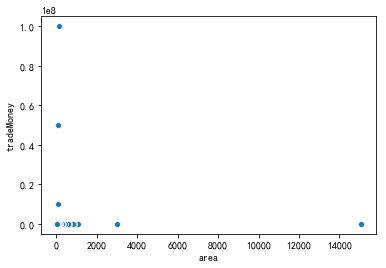

In [85]:
##--analysis "area" and "tradeMoney"
sns.scatterplot(x="area",y="tradeMoney",data=train_df)
plt.show()

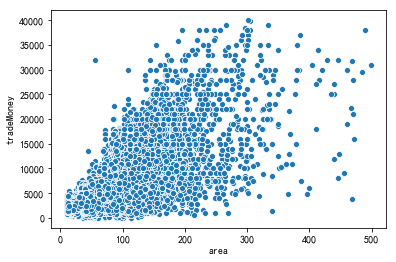

In [86]:
train_df=train_df[(train_df["area"]<500)&(train_df["area"]>10)]
train_df = train_df[train_df["tradeMoney"]<40000]
sns.scatterplot(x="area",y="tradeMoney",data=train_df)
plt.show()

## -------------------The predicted variable - tradeMoney Skew & kurtosis analysis----------------

In [87]:
print("Skewness:",train_df['tradeMoney'].skew())

Skewness: 3.3888078005519695


In [88]:
print("Kurtness:",train_df["tradeMoney"].kurt())

Kurtness: 17.264997083768737


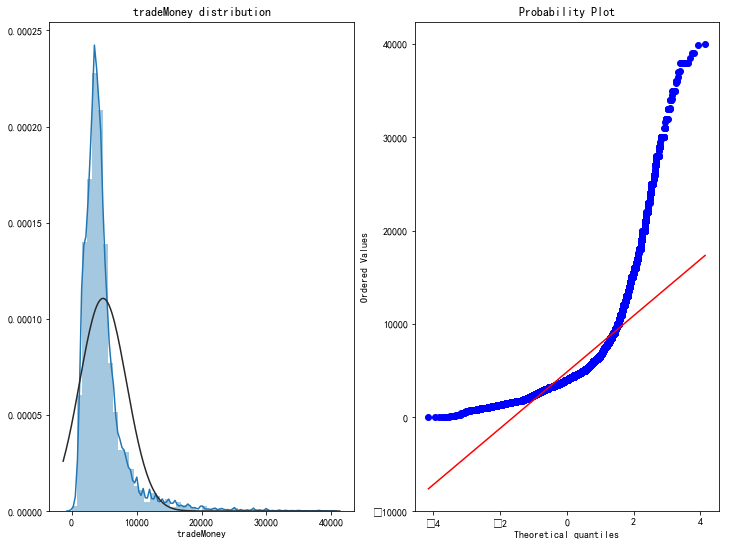

In [89]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(121)
sns.distplot(train_df["tradeMoney"],fit=norm)
plt.title('tradeMoney distribution')
ax2 = fig.add_subplot(122)
stats.probplot(train_df["tradeMoney"],plot=plt)
plt.show()

## --------------------------------------------------Missing data------------------------------------------------

In [90]:
##--locating missing data
data_feature = pd.concat((train_df,test_df)).reset_index(drop=True)
Total = data_feature.isnull().sum().sort_values(ascending=False)
Percent = Total/data_feature.isnull().count()
Missing_count = pd.concat((Total,Percent),axis=1,keys=['Total','Percent'],sort=False)
Missing_count[Missing_count.Total>0]

,Total,Percent
tradeMoney,2469,0.058
uv,20,0.000
pv,20,0.000


In [91]:
data_feature["rentType"].value_counts()

未知方式    32850
整租       5713
合租       3908
--          5
Name: rentType, dtype: int64

未知方式可以看成一个特征值

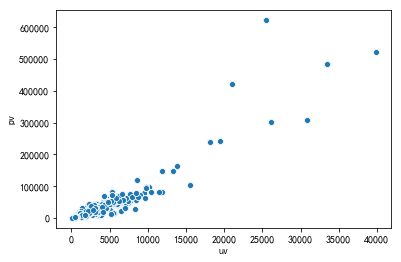

In [92]:
sns.scatterplot(x="uv",y="pv",data=data_feature)
plt.show()

这两个变量的相关性很强。

In [93]:
data_feature["uv"].fillna(data_feature["uv"].mean(),inplace=True)
data_feature["pv"].fillna(data_feature["pv"].mean(),inplace=True)
data_feature["pv"]=data_feature["pv"].astype(int)
data_feature["uv"]=data_feature["uv"].astype(int)

## -------------------------------------------Outlier Values------------------------------------------------

In [94]:
##--split the data set into numerical data and categorial--
categorial_feature=data_feature.select_dtypes(include=["object"]).columns
categorial_feature

Index(['buildYear', 'communityName', 'houseDecoration', 'houseFloor',
       'houseToward', 'houseType', 'plate', 'region', 'rentType', 'tradeTime'],
      dtype='object')

In [95]:
numerical_feature=data_feature.select_dtypes(exclude=["object"]).columns
numerical_feature

Index(['area', 'bankNum', 'busStationNum', 'drugStoreNum', 'gymNum',
       'hospitalNum', 'interSchoolNum', 'landMeanPrice', 'landTotalPrice',
       'lookNum', 'mallNum', 'newWorkers', 'parkNum', 'privateSchoolNum', 'pv',
       'remainNewNum', 'residentPopulation', 'saleSecHouseNum', 'schoolNum',
       'shopNum', 'subwayStationNum', 'superMarketNum', 'supplyLandArea',
       'supplyLandNum', 'supplyNewNum', 'totalFloor', 'totalNewTradeArea',
       'totalNewTradeMoney', 'totalTradeArea', 'totalTradeMoney',
       'totalWorkers', 'tradeLandArea', 'tradeLandNum', 'tradeMeanPrice',
       'tradeMoney', 'tradeNewMeanPrice', 'tradeNewNum', 'tradeSecNum', 'uv'],
      dtype='object')

In [96]:
## check categorial

data_feature["tradMonth"] = data_feature["tradeTime"].apply(lambda x:x.split("/")[1])
data_feature.drop("tradeTime",axis=1,inplace=True)

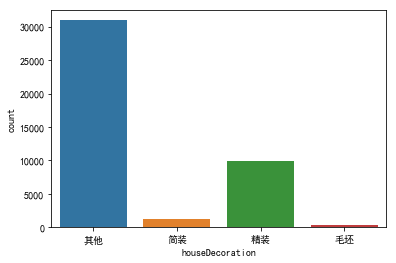

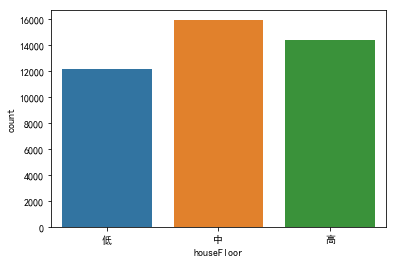

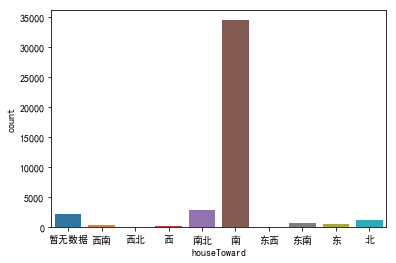

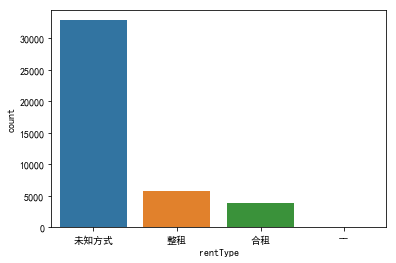

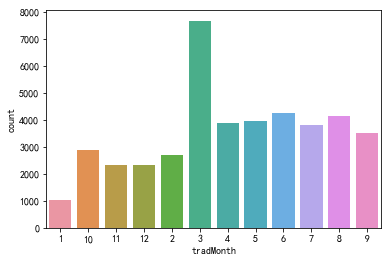

In [97]:
## plot
plt.rcParams['font.sans-serif']=['simhei']
columns_1=["houseDecoration","houseFloor","houseToward","rentType","tradMonth"];columns_2=["communityName","plate","region"]
for i in columns_1:
    sns.countplot(x=i,data=data_feature)
    plt.show()

In [98]:
data_feature["rentType"].value_counts()

未知方式    32850
整租       5713
合租       3908
--          5
Name: rentType, dtype: int64

出现了一个奇怪的值 "一"，把它归为位置方式

In [99]:
#data_feature=data_feature[data_feature["rentType"]!="--"]
data_feature["rentType"][data_feature["rentType"]=="--"]="未知方式"

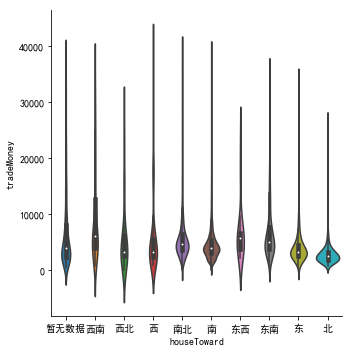

In [100]:
sns.catplot(x="houseToward",y="tradeMoney",data=data_feature,kind="violin")
plt.show()

"暂无数据"应该为"东北"，不过不改也没有影响

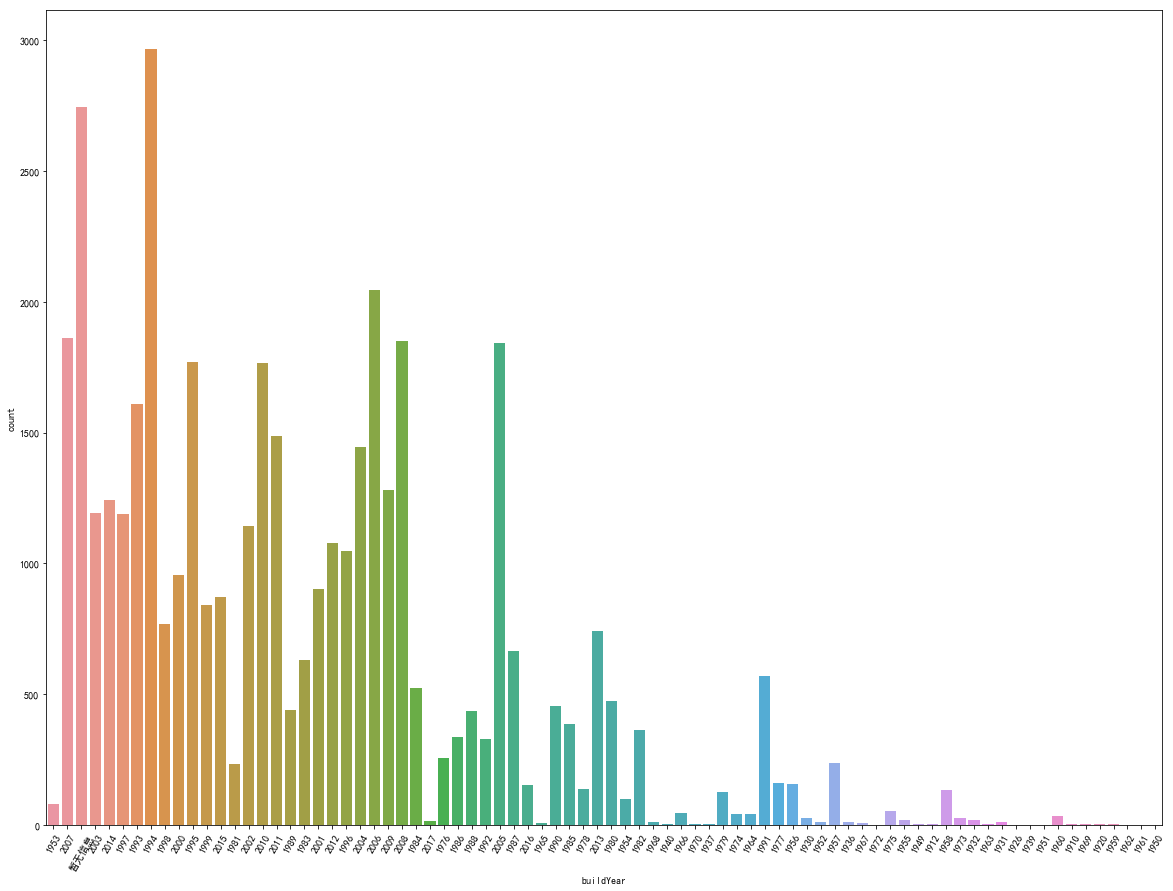

In [101]:
# "buildYear"
fig,ax=plt.subplots(figsize=(20,15))
sns.countplot(x="buildYear",data=data_feature,ax=ax)
plt.xticks(rotation=60)
plt.show()

有一列"暂无数据"需要填充

In [102]:
# The same communityName has same buildYear
inter=data_feature.groupby("communityName")
for name,group in inter["buildYear"]:
    print(name)
    print(group)
        

XQ00001
34124    2004
Name: buildYear, dtype: object
XQ00002
12916    2001
13855    2001
Name: buildYear, dtype: object
XQ00003
9969    1987
Name: buildYear, dtype: object
XQ00004
15160    1996
21244    1996
38399    1996
42283    1996
Name: buildYear, dtype: object
XQ00005
12233    1982
12484    1982
12740    1982
13294    1982
13582    1982
13590    1982
13675    1982
13683    1982
13840    1982
14005    1982
33702    1982
42288    1982
Name: buildYear, dtype: object
XQ00006
20971    1994
22605    1994
41286    1994
Name: buildYear, dtype: object
XQ00007
13759    1955
14007    1955
Name: buildYear, dtype: object
XQ00008
21288    1993
40849    1993
Name: buildYear, dtype: object
XQ00009
13591    1995
22273    1995
22276    1995
22600    1995
40860    1995
Name: buildYear, dtype: object
XQ00010
94       2002
10876    2002
20822    2002
Name: buildYear, dtype: object
XQ00011
12482    1994
13749    1994
13854    1994
17114    1994
17544    1994
20465    1994
21968    1994
23963    1994
2

XQ00191
13320    2001
19751    2001
41489    2001
Name: buildYear, dtype: object
XQ00192
5488     1986
24166    1986
Name: buildYear, dtype: object
XQ00193
14296    1988
Name: buildYear, dtype: object
XQ00194
14754    1996
15385    1996
16128    1996
16256    1996
19543    1996
26881    1996
29659    1996
39276    1996
42214    1996
Name: buildYear, dtype: object
XQ00195
1000     1989
1009     1989
1011     1989
1067     1989
1074     1989
1316     1989
5444     1989
5449     1989
5501     1989
5520     1989
6484     1989
6779     1989
8925     1989
14037    1989
14768    1989
14769    1989
14977    1989
15917    1989
16005    1989
16009    1989
16133    1989
16135    1989
16152    1989
16154    1989
16771    1989
18090    1989
18103    1989
19633    1989
19742    1989
21481    1989
22154    1989
22165    1989
24174    1989
25116    1989
26498    1989
26516    1989
33338    1989
37861    1989
37980    1989
41332    1989
Name: buildYear, dtype: object
XQ00196
269      1987
1041     1987

Name: buildYear, dtype: object
XQ00409
3414     2010
6755     2010
33413    2010
37231    2010
Name: buildYear, dtype: object
XQ00410
6756     2011
17336    2011
29094    2011
29113    2011
29355    2011
30560    2011
30566    2011
30590    2011
30910    2011
30922    2011
30924    2011
30937    2011
31608    2011
32675    2011
33404    2011
33705    2011
33799    2011
33803    2011
34194    2011
34196    2011
34555    2011
35300    2011
35305    2011
35676    2011
35694    2011
36058    2011
36065    2011
36085    2011
36092    2011
36095    2011
36444    2011
37143    2011
37211    2011
40250    2011
Name: buildYear, dtype: object
XQ00411
30549    1998
34192    1998
34885    1998
34963    1998
36456    1998
40443    1998
Name: buildYear, dtype: object
XQ00412
33416    2005
34576    2005
Name: buildYear, dtype: object
XQ00413
1620     2007
30551    2007
33406    2007
42204    2007
Name: buildYear, dtype: object
XQ00414
3970     2002
5657     2002
30948    2002
31589    2002
32287    2

3628     1993
32433    1993
Name: buildYear, dtype: object
XQ00606
858     2000
1689    2000
5761    2000
Name: buildYear, dtype: object
XQ00607
39901    2000
40002    2000
40332    2000
Name: buildYear, dtype: object
XQ00608
6564     1999
28798    1999
29218    1999
32448    1999
33706    1999
33929    1999
34727    1999
35828    1999
36219    1999
40472    1999
Name: buildYear, dtype: object
XQ00609
769      1996
31388    1996
Name: buildYear, dtype: object
XQ00610
1948     2005
31038    2005
Name: buildYear, dtype: object
XQ00611
7798     2002
31377    2002
Name: buildYear, dtype: object
XQ00612
33570    2004
34338    2004
36218    2004
37015    2004
37371    2004
37377    2004
40367    2004
Name: buildYear, dtype: object
XQ00613
28554    2002
30695    2002
36602    2002
37004    2002
40331    2002
Name: buildYear, dtype: object
XQ00614
922      1999
31752    1999
32843    1999
Name: buildYear, dtype: object
XQ00615
2106     暂无信息
33010    暂无信息
33577    暂无信息
33958    暂无信息
Name: build

Name: buildYear, dtype: object
XQ00827
33283    1998
33663    1998
34828    1998
42129    1998
Name: buildYear, dtype: object
XQ00828
3935     2002
31161    2002
31855    2002
Name: buildYear, dtype: object
XQ00829
4032     1996
5651     1996
5784     1996
28639    1996
29303    1996
29321    1996
29324    1996
30778    1996
30795    1996
30802    1996
31132    1996
31155    1996
31158    1996
31159    1996
31812    1996
32556    1996
34050    1996
34075    1996
34424    1996
34833    1996
34893    1996
35570    1996
35964    1996
35975    1996
36313    1996
36351    1996
36674    1996
37084    1996
37099    1996
37521    1996
40100    1996
Name: buildYear, dtype: object
XQ00830
3370     1991
3659     1991
5595     1991
5644     1991
5647     1991
5808     1991
5839     1991
5862     1991
6567     1991
6584     1991
6782     1991
28645    1991
28647    1991
28654    1991
28659    1991
30767    1991
30768    1991
31131    1991
31149    1991
31463    1991
31476    1991
31500    1991
3182

919      1999
6962     1999
30625    1999
34275    1999
42178    1999
Name: buildYear, dtype: object
XQ01021
30637    1998
30658    1998
30979    1998
31183    1998
33139    1998
34280    1998
36007    1998
36518    1998
42141    1998
Name: buildYear, dtype: object
XQ01022
30973    1994
Name: buildYear, dtype: object
XQ01023
3602     2002
35787    2002
35792    2002
Name: buildYear, dtype: object
XQ01024
5560     1994
33525    1994
Name: buildYear, dtype: object
XQ01025
34649    2003
35403    2003
35762    2003
Name: buildYear, dtype: object
XQ01026
3720     1992
6892     1992
8387     1992
28513    1992
30638    1992
30974    1992
31679    1992
33151    1992
33516    1992
34644    1992
36548    1992
38188    1992
39551    1992
39930    1992
40482    1992
Name: buildYear, dtype: object
XQ01027
33116    1998
34614    1998
42172    1998
Name: buildYear, dtype: object
XQ01028
902      2008
33155    2008
38724    2008
Name: buildYear, dtype: object
XQ01029
959    2012
Name: buildYear, dtyp

Name: buildYear, dtype: object
XQ01178
29202    1994
31361    1994
40045    1994
Name: buildYear, dtype: object
XQ01179
36190    1997
36568    1997
Name: buildYear, dtype: object
XQ01180
32802    1995
33175    1995
34680    1995
35815    1995
36951    1995
40147    1995
Name: buildYear, dtype: object
XQ01181
37357    2006
40031    2006
Name: buildYear, dtype: object
XQ01182
3845     2006
34111    2006
Name: buildYear, dtype: object
XQ01183
1721     2005
3541     2005
31023    2005
31365    2005
32800    2005
36563    2005
Name: buildYear, dtype: object
XQ01184
37361    1993
38083    1993
42130    1993
Name: buildYear, dtype: object
XQ01185
33907    2007
36572    2007
36945    2007
39961    2007
41827    2007
Name: buildYear, dtype: object
XQ01186
36205    1990
40275    1990
Name: buildYear, dtype: object
XQ01188
32864    2004
32888    2004
33230    2004
33240    2004
36265    2004
36266    2004
36277    2004
37021    2004
37430    2004
42149    2004
Name: buildYear, dtype: object
XQ011

152      1999
976      1999
1477     1999
1546     1999
1547     1999
1697     1999
1756     1999
1798     1999
1831     1999
1833     1999
1835     1999
1848     1999
1914     1999
1932     1999
1934     1999
1936     1999
1978     1999
1980     1999
1982     1999
2035     1999
2045     1999
2067     1999
2084     1999
2085     1999
2102     1999
2165     1999
2184     1999
2190     1999
2278     1999
2349     1999
2772     1999
4553     1999
4577     1999
6637     1999
6684     1999
6975     1999
7868     1999
7897     1999
7902     1999
7918     1999
7960     1999
7961     1999
7963     1999
8033     1999
8110     1999
8118     1999
8125     1999
8290     1999
8315     1999
8316     1999
8325     1999
8343     1999
8488     1999
8512     1999
8526     1999
9032     1999
9059     1999
9061     1999
9062     1999
9083     1999
9100     1999
9102     1999
9107     1999
9108     1999
9508     1999
9534     1999
9537     1999
9550     1999
9554     1999
9567     1999
9812     1999
9887  

Name: buildYear, dtype: object
XQ01580
2037     2013
2057     2013
2637     2013
2704     2013
6174     2013
8958     2013
11094    2013
11244    2013
11301    2013
12028    2013
12533    2013
20719    2013
41806    2013
Name: buildYear, dtype: object
XQ01581
11713    1995
12297    1995
24404    1995
41749    1995
Name: buildYear, dtype: object
XQ01582
150      2008
1002     2008
1458     2008
1653     2008
1903     2008
2076     2008
2097     2008
2152     2008
2238     2008
2858     2008
3442     2008
3550     2008
4384     2008
6093     2008
8417     2008
9756     2008
9772     2008
10445    2008
11091    2008
11104    2008
11108    2008
11413    2008
11658    2008
12031    2008
12582    2008
14173    2008
15261    2008
16673    2008
18390    2008
18695    2008
21346    2008
21697    2008
24017    2008
41849    2008
Name: buildYear, dtype: object
XQ01583
1507     2005
1517     2005
1518     2005
1654     2005
1898     2005
2055     2005
2073     2005
2233     2005
2720     2005
2737

Name: buildYear, dtype: object
XQ01759
7986    2005
Name: buildYear, dtype: object
XQ01760
4280     2005
4347     2005
12516    2005
Name: buildYear, dtype: object
XQ01761
7012     1997
7519     1997
8425     1997
8988     1997
10395    1997
10408    1997
11098    1997
12998    1997
14699    1997
32596    1997
37763    1997
41748    1997
Name: buildYear, dtype: object
XQ01762
11440    1986
Name: buildYear, dtype: object
XQ01763
3875     2011
4281     2011
4286     2011
4307     2011
4334     2011
6148     2011
7821     2011
8010     2011
8022     2011
8258     2011
8412     2011
8442     2011
8997     2011
9001     2011
9465     2011
9779     2011
10237    2011
10249    2011
10402    2011
11251    2011
11252    2011
11399    2011
11432    2011
11451    2011
11650    2011
11822    2011
12032    2011
12558    2011
12965    2011
14191    2011
15674    2011
16091    2011
17513    2011
18291    2011
19049    2011
20281    2011
20612    2011
21596    2011
21603    2011
21949    2011
21950   

Name: buildYear, dtype: object
XQ01930
23805    1980
25154    1980
25178    1980
26911    1980
42240    1980
Name: buildYear, dtype: object
XQ01932
6751     1997
28378    1997
Name: buildYear, dtype: object
XQ01933
7573     1995
19598    1995
22147    1995
23812    1995
26185    1995
26191    1995
27269    1995
32196    1995
39688    1995
40384    1995
Name: buildYear, dtype: object
XQ01934
6462    1998
Name: buildYear, dtype: object
XQ01935
6397     1994
19580    1994
23126    1994
23452    1994
23470    1994
24816    1994
25150    1994
25168    1994
25170    1994
25835    1994
26901    1994
27273    1994
28028    1994
28382    1994
28385    1994
28992    1994
29712    1994
34117    1994
40385    1994
Name: buildYear, dtype: object
XQ01936
30462    1994
Name: buildYear, dtype: object
XQ01937
3140     2002
3256     2002
3283     2002
3285     2002
5278     2002
6391     2002
6750     2002
19590    2002
20158    2002
23460    2002
24810    2002
25158    2002
25852    2002
26552    2002


XQ02112
722      2001
20164    2001
28408    2001
29733    2001
Name: buildYear, dtype: object
XQ02113
5318    1999
Name: buildYear, dtype: object
XQ02114
29029    1997
Name: buildYear, dtype: object
XQ02115
23830    暂无信息
27663    暂无信息
39466    暂无信息
40573    暂无信息
Name: buildYear, dtype: object
XQ02116
3408    1994
Name: buildYear, dtype: object
XQ02117
32230    1996
39749    1996
42043    1996
Name: buildYear, dtype: object
XQ02118
19608    1998
37631    1998
40513    1998
Name: buildYear, dtype: object
XQ02119
707      暂无信息
709      暂无信息
1046     暂无信息
1070     暂无信息
1129     暂无信息
1130     暂无信息
2598     暂无信息
3118     暂无信息
3849     暂无信息
3953     暂无信息
5316     暂无信息
5327     暂无信息
5351     暂无信息
6799     暂无信息
8806     暂无信息
19613    暂无信息
23150    暂无信息
23839    暂无信息
24835    暂无信息
25198    暂无信息
26934    暂无信息
27294    暂无信息
27667    暂无信息
28397    暂无信息
29032    暂无信息
30119    暂无信息
30496    暂无信息
38050    暂无信息
38080    暂无信息
38110    暂无信息
38156    暂无信息
Name: buildYear, dtype: object
XQ02120
25197    1

877      1994
927      1994
928      1994
929      1994
1480     1994
3359     1994
3469     1994
3471     1994
3559     1994
3665     1994
3684     1994
5378     1994
5382     1994
5384     1994
5409     1994
6459     1994
6478     1994
17729    1994
22729    1994
23413    1994
28428    1994
29054    1994
29372    1994
30529    1994
30542    1994
30866    1994
30874    1994
30883    1994
30886    1994
31228    1994
31231    1994
31559    1994
31561    1994
32157    1994
32259    1994
32270    1994
32658    1994
33028    1994
33040    1994
33375    1994
33393    1994
34530    1994
34535    1994
34898    1994
34914    1994
37187    1994
37198    1994
40495    1994
Name: buildYear, dtype: object
XQ02289
5356     2002
32253    2002
Name: buildYear, dtype: object
XQ02290
836      2000
863      2000
888      2000
944      2000
1709     2000
1757     2000
3360     2000
3412     2000
3515     2000
3534     2000
3682     2000
5339     2000
5346     2000
5359     2000
5361     2000
5393     200

Name: buildYear, dtype: object
XQ02512
10683    1987
13181    1987
Name: buildYear, dtype: object
XQ02513
21518    2003
22188    2003
23885    2003
39051    2003
42383    2003
Name: buildYear, dtype: object
XQ02514
23856    2002
41654    2002
Name: buildYear, dtype: object
XQ02515
18445    1986
Name: buildYear, dtype: object
XQ02516
2623     2002
7465     2002
9416     2002
10057    2002
10061    2002
20512    2002
41794    2002
Name: buildYear, dtype: object
XQ02517
1282     1996
17236    1996
Name: buildYear, dtype: object
XQ02518
18214    1990
21420    1990
21515    1990
21751    1990
37909    1990
41796    1990
Name: buildYear, dtype: object
XQ02519
101     1998
6042    1998
7406    1998
Name: buildYear, dtype: object
XQ02520
2868     1998
17586    1998
21419    1998
Name: buildYear, dtype: object
XQ02521
22752    1995
25367    1995
41264    1995
Name: buildYear, dtype: object
XQ02522
8200     1994
24090    1994
41931    1994
Name: buildYear, dtype: object
XQ02523
15       1999
170

Name: buildYear, dtype: object
XQ02713
22014    暂无信息
39976    暂无信息
40973    暂无信息
Name: buildYear, dtype: object
XQ02714
4208     1989
24101    1989
Name: buildYear, dtype: object
XQ02715
22333    1982
Name: buildYear, dtype: object
XQ02716
4185    1936
Name: buildYear, dtype: object
XQ02717
20685    1995
Name: buildYear, dtype: object
XQ02718
18692    1983
Name: buildYear, dtype: object
XQ02719
4200     2011
17167    2011
17238    2011
22096    2011
22099    2011
42116    2011
Name: buildYear, dtype: object
XQ02720
15309    2000
22665    2000
Name: buildYear, dtype: object
XQ02721
24093    2001
37123    2001
37678    2001
38465    2001
41043    2001
Name: buildYear, dtype: object
XQ02722
2701    2002
Name: buildYear, dtype: object
XQ02723
15236    2015
Name: buildYear, dtype: object
XQ02724
1032     2007
40667    2007
Name: buildYear, dtype: object
XQ02725
24097    暂无信息
25387    暂无信息
37604    暂无信息
37648    暂无信息
37873    暂无信息
37887    暂无信息
38560    暂无信息
39513    暂无信息
42115    暂无信息
Name:

Name: buildYear, dtype: object
XQ02903
18207    1976
20513    1976
Name: buildYear, dtype: object
XQ02904
15092    1978
Name: buildYear, dtype: object
XQ02905
8919     1982
13391    1982
Name: buildYear, dtype: object
XQ02906
14844    1974
16501    1974
Name: buildYear, dtype: object
XQ02907
14388    1978
23854    1978
Name: buildYear, dtype: object
XQ02908
15812    1989
20193    1989
41973    1989
Name: buildYear, dtype: object
XQ02909
18523    1973
40846    1973
Name: buildYear, dtype: object
XQ02910
14696    1999
Name: buildYear, dtype: object
XQ02911
9666     2005
14692    2005
15591    2005
16097    2005
17757    2005
18519    2005
18970    2005
25227    2005
36387    2005
37697    2005
37714    2005
37813    2005
37869    2005
41302    2005
Name: buildYear, dtype: object
XQ02912
13210    1984
14378    1984
41944    1984
Name: buildYear, dtype: object
XQ02913
15608    1953
Name: buildYear, dtype: object
XQ02914
974      2008
977      2008
1157     2008
1217     2008
1858     2008


Name: buildYear, dtype: object
XQ03110
187      暂无信息
220      暂无信息
222      暂无信息
300      暂无信息
314      暂无信息
413      暂无信息
435      暂无信息
436      暂无信息
581      暂无信息
1073     暂无信息
1082     暂无信息
1090     暂无信息
1208     暂无信息
1216     暂无信息
1221     暂无信息
1375     暂无信息
1377     暂无信息
1398     暂无信息
1406     暂无信息
1407     暂无信息
1445     暂无信息
2974     暂无信息
3035     暂无信息
3323     暂无信息
3767     暂无信息
4976     暂无信息
4996     暂无信息
5000     暂无信息
5047     暂无信息
5084     暂无信息
5086     暂无信息
5109     暂无信息
6382     暂无信息
6987     暂无信息
9266     暂无信息
11629    暂无信息
12240    暂无信息
12492    暂无信息
12493    暂无信息
12754    暂无信息
12927    暂无信息
12928    暂无信息
12930    暂无信息
12933    暂无信息
13599    暂无信息
13600    暂无信息
13687    暂无信息
13858    暂无信息
14009    暂无信息
15881    暂无信息
17308    暂无信息
18041    暂无信息
19272    暂无信息
19288    暂无信息
19289    暂无信息
19895    暂无信息
19971    暂无信息
19993    暂无信息
20002    暂无信息
20055    暂无信息
20498    暂无信息
21495    暂无信息
22870    暂无信息
22919    暂无信息
22946    暂无信息
23240    暂无信息
23301    暂无信息
23587    暂无信息
23606    

Name: buildYear, dtype: object
XQ03286
3372     2011
4977     2011
5043     2011
6385     2011
7796     2011
22990    2011
23683    2011
23697    2011
23715    2011
25022    2011
25685    2011
26464    2011
26728    2011
27134    2011
27139    2011
27867    2011
27899    2011
28163    2011
29938    2011
30363    2011
32056    2011
37665    2011
40636    2011
Name: buildYear, dtype: object
XQ03287
4958     2007
20065    2007
26035    2007
Name: buildYear, dtype: object
XQ03288
512    2014
Name: buildYear, dtype: object
XQ03289
808      2015
20001    2015
40503    2015
Name: buildYear, dtype: object
XQ03290
25016    暂无信息
27129    暂无信息
Name: buildYear, dtype: object
XQ03291
25645    2014
26407    2014
40729    2014
Name: buildYear, dtype: object
XQ03292
693      2015
6833     2015
40702    2015
Name: buildYear, dtype: object
XQ03293
4982     2014
28820    2014
Name: buildYear, dtype: object
XQ03294
4965     2015
19485    2015
22938    2015
23628    2015
25056    2015
25633    2015
26333  

Name: buildYear, dtype: object
XQ03479
12429    1985
Name: buildYear, dtype: object
XQ03480
12428    1985
Name: buildYear, dtype: object
XQ03481
12172    1984
12425    1984
13428    1984
Name: buildYear, dtype: object
XQ03482
9217     1987
9903     1987
11564    1987
11577    1987
12445    1987
12451    1987
12872    1987
13328    1987
13437    1987
13516    1987
13616    1987
13936    1987
14053    1987
15512    1987
16271    1987
17362    1987
18865    1987
19654    1987
20764    1987
39206    1987
41960    1987
Name: buildYear, dtype: object
XQ03483
13416    1985
Name: buildYear, dtype: object
XQ03484
6667     1991
6979     1991
10811    1991
13235    1991
13341    1991
13515    1991
13700    1991
13788    1991
14393    1991
14489    1991
14508    1991
15299    1991
16026    1991
16818    1991
16930    1991
16945    1991
18122    1991
18744    1991
18873    1991
19184    1991
19679    1991
19773    1991
24081    1991
33005    1991
34471    1991
41775    1991
Name: buildYear, dtype: 

Name: buildYear, dtype: object
XQ03659
17250    1996
37962    1996
Name: buildYear, dtype: object
XQ03660
17253    2005
22760    2005
24092    2005
24107    2005
37876    2005
37895    2005
37905    2005
37906    2005
37975    2005
37979    2005
38832    2005
39427    2005
41211    2005
Name: buildYear, dtype: object
XQ03661
18644    1996
18647    1996
23975    1996
24313    1996
25345    1996
41201    1996
Name: buildYear, dtype: object
XQ03662
3782     1981
15974    1981
16973    1981
Name: buildYear, dtype: object
XQ03663
15005    2003
15064    2003
15921    2003
15969    2003
16204    2003
16813    2003
19703    2003
39159    2003
39196    2003
39270    2003
42312    2003
Name: buildYear, dtype: object
XQ03664
12880    2000
13243    2000
14890    2000
16416    2000
41238    2000
Name: buildYear, dtype: object
XQ03665
15961    1994
16413    1994
16482    1994
19762    1994
41378    1994
Name: buildYear, dtype: object
XQ03666
286      1995
13951    1995
14364    1995
Name: buildYear,

XQ03811
22337    1990
40986    1990
Name: buildYear, dtype: object
XQ03812
20746    1993
21866    1993
24388    1993
Name: buildYear, dtype: object
XQ03813
24364    1994
Name: buildYear, dtype: object
XQ03814
37567    2002
41287    2002
Name: buildYear, dtype: object
XQ03815
17984    1992
24027    1992
41127    1992
Name: buildYear, dtype: object
XQ03816
22696    1975
24041    1975
Name: buildYear, dtype: object
XQ03817
2892     2003
14441    2003
41055    2003
Name: buildYear, dtype: object
XQ03818
2703    2005
Name: buildYear, dtype: object
XQ03819
15278    1987
15768    1987
17195    1987
18381    1987
18746    1987
20413    1987
20422    1987
21047    1987
21405    1987
22389    1987
22716    1987
38771    1987
39401    1987
39405    1987
41084    1987
Name: buildYear, dtype: object
XQ03820
20707    1999
37559    1999
Name: buildYear, dtype: object
XQ03821
1561     1998
13819    1998
Name: buildYear, dtype: object
XQ03822
15252    1995
16672    1995
16707    1995
17650    1995
2171

Name: buildYear, dtype: object
XQ04007
16947    2002
37840    2002
37890    2002
Name: buildYear, dtype: object
XQ04008
6295     1997
17657    1997
Name: buildYear, dtype: object
XQ04009
15942    1999
19781    1999
24420    1999
Name: buildYear, dtype: object
XQ04010
316      2005
599      2005
4622     2005
4634     2005
4662     2005
6938     2005
13343    2005
14339    2005
14654    2005
14798    2005
15035    2005
15038    2005
16049    2005
16837    2005
17367    2005
17654    2005
18131    2005
18134    2005
18881    2005
18891    2005
19677    2005
19684    2005
19787    2005
37819    2005
41230    2005
Name: buildYear, dtype: object
XQ04011
2474     2009
4596     2009
13350    2009
13356    2009
16046    2009
16841    2009
17233    2009
18144    2009
18436    2009
22734    2009
31888    2009
41328    2009
Name: buildYear, dtype: object
XQ04012
14332    1958
14797    1958
15419    1958
16831    1958
19671    1958
19681    1958
39336    1958
41241    1958
Name: buildYear, dtype: 

18161    暂无信息
Name: buildYear, dtype: object
XQ04232
14829    1990
15447    1990
16345    1990
19821    1990
31112    1990
32518    1990
32908    1990
33258    1990
34394    1990
34777    1990
34785    1990
35138    1990
41074    1990
Name: buildYear, dtype: object
XQ04233
16318    1999
16964    1999
18906    1999
29285    1999
41237    1999
Name: buildYear, dtype: object
XQ04234
288      2013
34011    2013
38432    2013
Name: buildYear, dtype: object
XQ04235
31106    2002
31449    2002
35522    2002
41109    2002
Name: buildYear, dtype: object
XQ04236
25487    1986
Name: buildYear, dtype: object


结果发现，缺失值是一个小区一个小区的缺，所以想做的话，只能把一个小区的"buildYear"设为一样。先不处理~

In [103]:
data_feature['buildYear'] = np.where(data_feature['buildYear'] == '暂无信息', 2019, data_feature['buildYear'])
data_feature['buildYear'] = data_feature['buildYear'].astype(int)
data_feature['buildYear'] = 2019-data_feature['buildYear']

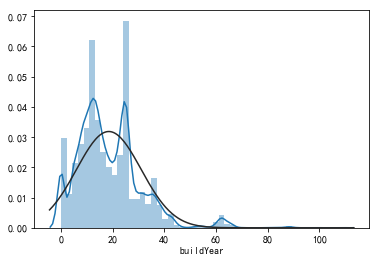

In [104]:
#transfrom buildYear to numerical feature
sns.distplot(data_feature["buildYear"],fit=norm)
plt.show()

In [105]:
print("buildYear before transform:")
print(data_feature["buildYear"].skew())
print(data_feature["buildYear"].kurt())

buildYear before transform:
1.353824299374159
3.833936980448427


In [106]:
lm=0.15
data_feature["buildYear"]=boxcox1p(data_feature["buildYear"],lm)

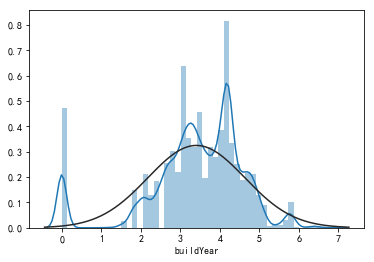

In [107]:
sns.distplot(data_feature["buildYear"],fit=norm)
plt.show()

In [108]:
print("buildYear after transform:")
print(data_feature["buildYear"].skew())
print(data_feature["buildYear"].kurt())

buildYear after transform:
-1.0878016290029313
1.5833315899968214


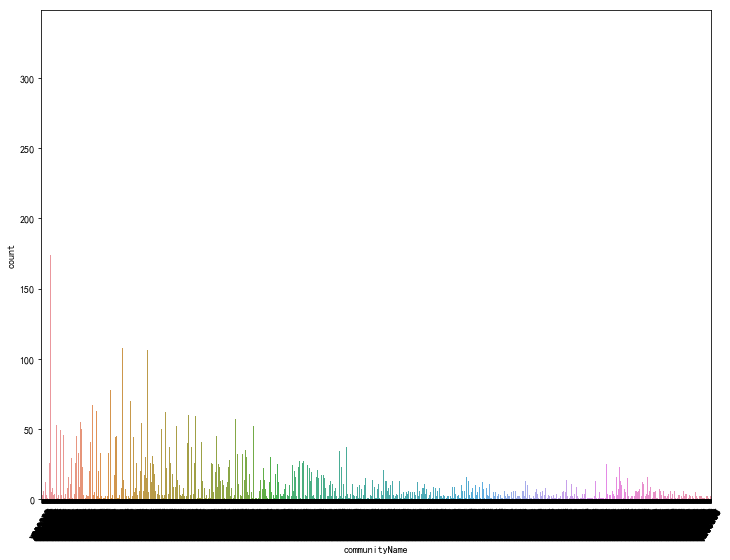

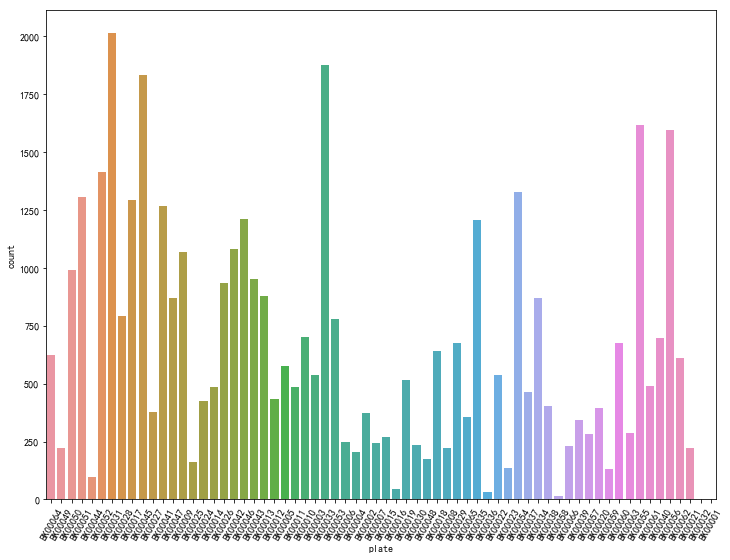

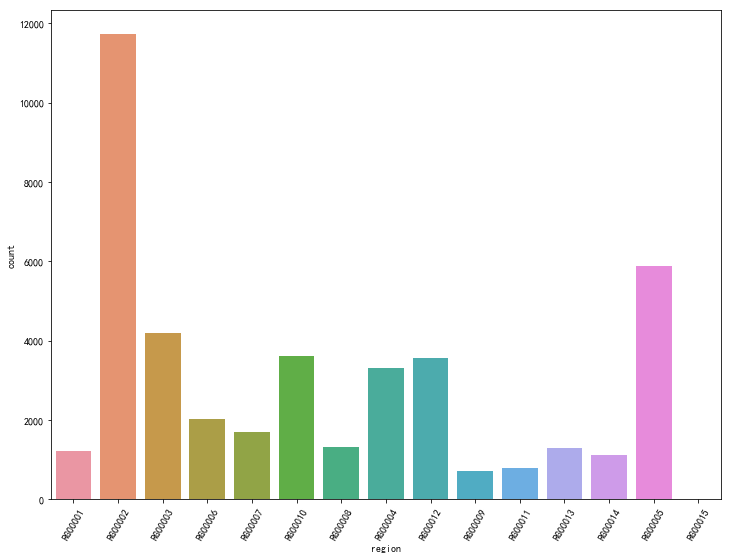

In [109]:
for j in columns_2:
    fig,ax=plt.subplots(figsize=(12,9))
    sns.countplot(x=j,data=data_feature,ax=ax)
    plt.xticks(rotation=60)
    plt.show()

从图形上看，communityName特征太多，区分度不高，后期看一下怎么处理,这里先直接删掉

In [110]:
data_feature.drop("communityName",axis=1,inplace=True)
def parseRoom(info, index):
    res = int(info[index*2])
    return res
data_feature.insert(3,'室',None)
data_feature.insert(4, '厅', None)
data_feature.insert(5, '卫', None)
data_feature['室'] = data_feature['houseType'].apply(parseRoom, index=0)
data_feature['厅'] = data_feature['houseType'].apply(parseRoom, index=1)
data_feature['卫'] = data_feature['houseType'].apply(parseRoom, index=2)
data_feature.drop("houseType",axis=1,inplace=True)


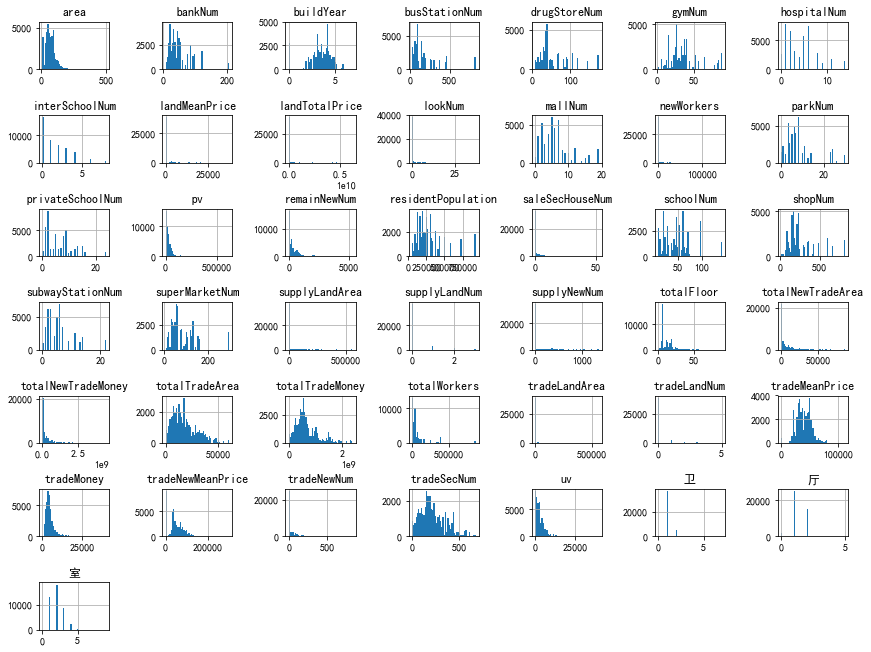

In [111]:
## check numerical feature

data_feature.hist(bins=50,figsize=(12,9))
plt.tight_layout(pad=0.5)
plt.show()

In [112]:
data_feature.head(20)

,area,bankNum,buildYear,室,厅,卫,busStationNum,drugStoreNum,gymNum,hospitalNum,houseDecoration,houseFloor,houseToward,interSchoolNum,landMeanPrice,landTotalPrice,lookNum,mallNum,newWorkers,parkNum,plate,privateSchoolNum,pv,region,remainNewNum,rentType,residentPopulation,saleSecHouseNum,schoolNum,shopNum,subwayStationNum,superMarketNum,supplyLandArea,supplyLandNum,supplyNewNum,totalFloor,totalNewTradeArea,totalNewTradeMoney,totalTradeArea,totalTradeMoney,totalWorkers,tradeLandArea,tradeLandNum,tradeMeanPrice,tradeMoney,tradeNewMeanPrice,tradeNewNum,tradeSecNum,uv,tradMonth
0,68.060,16,5.860,2,1,1,36,12,15,1,其他,低,暂无数据,0,0.000,0,0,3,614,5,BK00064,1,1124,RG00001,264,未知方式,111546,0,28,76,7,22,0.000,0,0,16,7755,810967373,7411.980,355584000,28248,0.000,0,47974.226,2000.000,104573.485,25,111,284,11
1,125.550,16,3.128,3,2,2,184,27,5,1,简装,中,暂无数据,0,0.000,0,1,4,148,6,BK00049,0,701,RG00002,4,未知方式,157552,0,26,163,2,51,0.000,0,0,14,286,9668955,122.830,5000000,14823,0.000,0,40706.668,2000.000,33807.535,2,2,22,12
2,132.000,37,0.000,3,2,2,60,24,35,3,其他,低,暂无数据,1,0.000,0,1,4,520,6,BK00050,2,57,RG00002,159,未知方式,131744,3,43,85,6,30,0.000,0,126,32,3143,344894466,49071.300,1687284798,77645,0.000,0,34384.351,16000.000,109734.160,11,555,20,12
3,57.000,47,0.000,1,1,1,364,83,30,8,精装,中,暂无数据,2,3080.033,332760000,9,1,1665,3,BK00051,1,888,RG00002,730,未知方式,253337,0,60,358,3,131,108037.800,1,0,17,6418,196307819,22809.700,468272888,8750,108037.800,1,20529.551,1600.000,30587.071,58,260,279,12
4,129.000,10,0.000,3,2,3,141,21,5,0,毛坯,低,暂无数据,0,0.000,0,0,2,117,5,BK00044,0,2038,RG00003,851,未知方式,125309,1,15,100,0,34,0.000,0,216,2,5608,286722058,4463.620,108851470,800,0.000,0,24386.366,2900.000,51127.328,34,38,480,11
5,223.350,95,3.530,4,3,3,276,118,64,14,其他,低,暂无数据,2,0.000,0,0,5,44561,23,BK00052,12,4832,RG00002,446,未知方式,719428,1,142,483,22,154,41130.800,1,351,2,14161,1166702553,19775.260,827536466,48204,0.000,0,41847.059,14000.000,82388.430,146,276,1304,11
6,78.940,47,2.056,2,2,1,364,83,30,8,其他,中,暂无数据,2,0.000,0,0,1,1467,3,BK00051,1,1586,RG00002,788,未知方式,253337,6,60,358,3,131,0.000,0,0,18,5062,150297094,18080.570,363542000,8750,0.000,0,20106.778,1000.000,29691.247,46,216,469,11
7,76.000,86,4.003,2,1,1,461,106,36,6,其他,中,暂无数据,4,0.000,0,0,12,0,7,BK00031,5,40787,RG00006,643,未知方式,371900,0,71,598,6,119,0.000,0,328,5,41256,1468063801,42188.640,960190000,28546,0.000,0,22759.444,1800.000,35584.250,389,481,2942,3
8,120.550,86,3.128,3,2,1,461,106,36,6,其他,中,暂无数据,4,0.000,0,0,12,0,7,BK00031,5,40787,RG00006,643,未知方式,371900,0,71,598,6,119,0.000,0,328,6,41256,1468063801,42188.640,960190000,28546,0.000,0,22759.444,1450.000,35584.250,389,481,2942,3
9,83.000,86,4.263,3,1,1,461,106,36,6,其他,中,暂无数据,4,0.000,0,0,12,0,7,BK00031,5,34441,RG00006,946,未知方式,371900,0,71,598,6,119,0.000,0,422,5,12627,426759254,29637.500,624380000,28546,0.000,0,21067.229,1700.000,33797.359,119,331,3035,4


In [113]:
## OneHotEnconder
data_feature.drop(labels="tradeMoney",axis=1,inplace=True)
final_feature=pd.get_dummies(data_feature)
final_feature.shape
final_feature.head(10)

,area,bankNum,buildYear,室,厅,卫,busStationNum,drugStoreNum,gymNum,hospitalNum,interSchoolNum,landMeanPrice,landTotalPrice,lookNum,mallNum,newWorkers,parkNum,privateSchoolNum,pv,remainNewNum,residentPopulation,saleSecHouseNum,schoolNum,shopNum,subwayStationNum,superMarketNum,supplyLandArea,supplyLandNum,supplyNewNum,totalFloor,totalNewTradeArea,totalNewTradeMoney,totalTradeArea,totalTradeMoney,totalWorkers,tradeLandArea,tradeLandNum,tradeMeanPrice,tradeNewMeanPrice,tradeNewNum,tradeSecNum,uv,houseDecoration_其他,houseDecoration_毛坯,houseDecoration_简装,houseDecoration_精装,houseFloor_中,houseFloor_低,houseFloor_高,houseToward_东,houseToward_东南,houseToward_东西,houseToward_北,houseToward_南,houseToward_南北,houseToward_暂无数据,houseToward_西,houseToward_西北,houseToward_西南,plate_BK00001,plate_BK00002,plate_BK00003,plate_BK00004,plate_BK00005,plate_BK00006,plate_BK00007,plate_BK00008,plate_BK00009,plate_BK00010,plate_BK00011,plate_BK00012,plate_BK00013,plate_BK00014,plate_BK00015,plate_BK00016,plate_BK00017,plate_BK00018,plate_BK00019,plate_BK00020,plate_BK00021,plate_BK00022,plate_BK00023,plate_BK00024,plate_BK00025,plate_BK00026,plate_BK00027,plate_BK00028,plate_BK00029,plate_BK00030,plate_BK00031,plate_BK00032,plate_BK00033,plate_BK00034,plate_BK00035,plate_BK00036,plate_BK00037,plate_BK00038,plate_BK00039,plate_BK00040,plate_BK00041,plate_BK00042,plate_BK00043,plate_BK00044,plate_BK00045,plate_BK00046,plate_BK00047,plate_BK00048,plate_BK00049,plate_BK00050,plate_BK00051,plate_BK00052,plate_BK00053,plate_BK00054,plate_BK00055,plate_BK00056,plate_BK00057,plate_BK00058,plate_BK00059,plate_BK00060,plate_BK00061,plate_BK00062,plate_BK00063,plate_BK00064,plate_BK00065,plate_BK00066,region_RG00001,region_RG00002,region_RG00003,region_RG00004,region_RG00005,region_RG00006,region_RG00007,region_RG00008,region_RG00009,region_RG00010,region_RG00011,region_RG00012,region_RG00013,region_RG00014,region_RG00015,rentType_合租,rentType_整租,rentType_未知方式,tradMonth_1,tradMonth_10,tradMonth_11,tradMonth_12,tradMonth_2,tradMonth_3,tradMonth_4,tradMonth_5,tradMonth_6,tradMonth_7,tradMonth_8,tradMonth_9
0,68.060,16,5.860,2,1,1,36,12,15,1,0,0.000,0,0,3,614,5,1,1124,264,111546,0,28,76,7,22,0.000,0,0,16,7755,810967373,7411.980,355584000,28248,0.000,0,47974.226,104573.485,25,111,284,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,125.550,16,3.128,3,2,2,184,27,5,1,0,0.000,0,1,4,148,6,0,701,4,157552,0,26,163,2,51,0.000,0,0,14,286,9668955,122.830,5000000,14823,0.000,0,40706.668,33807.535,2,2,22,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,132.000,37,0.000,3,2,2,60,24,35,3,1,0.000,0,1,4,520,6,2,57,159,131744,3,43,85,6,30,0.000,0,126,32,3143,344894466,49071.300,1687284798,77645,0.000,0,34384.351,109734.160,11,555,20,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,57.000,47,0.000,1,1,1,364,83,30,8,2,3080.033,332760000,9,1,1665,3,1,888,730,253337,0,60,358,3,131,108037.800,1,0,17,6418,196307819,22809.700,468272888,8750,108037.800,1,20529.551,30587.071,58,260,279,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,129.000,10,0.000,3,2,3,141,21,5,0,0,0.000,0,0,2,117,5,0,2038,851,125309,1,15,100,0,34,0.000,0,216,2,5608,286722058,4463.620,108851470,800,0.000,0,24386.366,51127.328,34,38,480,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [114]:
X_train=final_feature.iloc[:len(train_df["tradeMoney"]),:]
Y_train=train_df["tradeMoney"]
X_test=final_feature.iloc[len(train_df["tradeMoney"]):,:]
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (40007, 155)
Y_train shape: (40007,)
X_test shape: (2469, 155)


## -------------------------------------------------------Creating Model------------------------------------------------- 
### Key features of the model training process
#### Cross Validation:using 10-fold cross validation
#### On each run of cross validation fit 7models(ridge,svr,gradient boosting,random forest,xgboost,lightgbm regressor)
#### Stacking: trained a meta StackingCVRegressor optimized using xgboost
#### Blending:All model trained will overfit the training data to varying degrees.Therefore,blended all models to make final predition

In [115]:
#import libraries
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

In [116]:
#defining folds and score function
kfolds=KFold(n_splits=5,shuffle=True,random_state=42)
def cv_rmse(model):
    rmse=np.sqrt(-cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv=kfolds))
    return rmse
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [117]:
#defining models
#light gredient boosting Regressor
lightgbm=LGBMRegressor(object="regression",
                      num_leaves=31,
                      learning_rate=0.01,
                      n_estimators=500,
                      max_bin=200,
                      bagging_fraction=0.8,
                      bagging_freq=1,
                      bagging_seed=23,
                      feature_fraction=0.8,
                      feature_fraction_seed=8,
                      min_sum_hessian_in_leaf = 11,
                      verbose=-1,
                      random_state=42)
#XGBoost Regressor
xgboost=XGBRegressor(learning_rate=0.1,
                    n_estimators=800,
                    max_depth=4,
                    min_child_weight=0,
                    gamma=0.6,
                    subsample=0.7,
                    colsample_bytree=0.7,
                    objective='reg:squarederror',
                    nthread=-1,
                    scale_pos_weight=1,
                    seed=27,
                    reg_alpha=0.00006,
                    random_state=42)
#Ridge Regressor
ridge_alphas=[1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50,]
ridge=make_pipeline(RobustScaler(),RidgeCV(alphas=ridge_alphas, cv=kfolds))
#Support Vector Regressor
svr=make_pipeline(RobustScaler(),SVR(C= 20, epsilon= 0.008, gamma=0.0003))
#gredient boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)


In [118]:
##Train models
# get cross validation score for each model
scores={}
score=cv_rmse(lightgbm)
print("lightgbm\n mean:{:.3f}  std:{:.3f}".format(score.mean(),score.std()))
scores["lightgbm"]=((score.mean()),(score.std()))

lightgbm
 mean:1310.133  std:44.320


In [119]:
# score=cv_rmse(xgboost)
# print("xgboost\n mean:{:.3f}  std:{:.3f}".format(score.mean(),score.std()))
# scores["xgboost"]=(score.mean(),score.std())

In [120]:
# score=cv_rmse(ridge)
# print("ridge\n mean:{:.3f}  std:{:3f}".format(score.mean(),score.std()))
# scores["ridge"]=(score.mean(),score.mean())

In [121]:
# score=cv_rmse(svr)
# print("svr\n mean:{:.3f}  std:{:3.f}".format(score.mean(),score.std()))
# scores["svr"]=(score.mean(),score.std())

In [122]:
# score=cv_rmse(gbr)
# print("gbr\n mean:{:.3f} std:{:.3f}".format(score.mean(),score.std()))
# scores["gbr"]=(score.mean(),score.std())

In [123]:
score=cv_rmse(lightgbm)
print("rf\n mean:{:.3f}  std:{:.3f}".format(score.mean(),score.std()))
scores["rf"]=(score.mean(),score.std())

rf
 mean:1310.133  std:44.320


In [124]:
#Fit the model
elf=lightgbm.fit(X_train,Y_train)
pre = elf.predict(X_test)
pre

array([3906.30998966, 5457.59184901, 6264.58848247, ..., 4658.84753164,
       5996.83661516, 4013.06716775])

In [125]:
## predice score
from sklearn.metrics import r2_score
def online_score(pred):
    print("预测结果最大值：{}，预测结果最小值：{}".format(pred.max(),pred.min()))
    # a榜上分
    combine1 = pd.read_csv('D:/数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/sub_a_913.csv',engine = "python",header=None)
    score1 = r2_score(pred,combine1)
    print("score1:{}".format(score1))
    # # b榜上分
    # combine2 = pd.read_csv('sub_b_9194.csv')
    # score2 = r2_score(pred,combine2)
    # print("对比919分数：{}".format(score2))
scores=online_score(pre)
scores

预测结果最大值：18791.469651180647，预测结果最小值：1533.7254804634495
score1:0.9183524009730633
